## Data Manipulation with Pandas

<style>
b{
    color:red; 
    color: #ff0000;
    color:rgb(255, 0, 0);
}
</style>


Every column in a DataFrame must contain the same data type but different rows can contain diffferent data types <br></br>
DF = DataFrame <br></br>
Row = observations <br></br>
Column = variable 
#### Quickly exploring DataFrames
<b>df.head()</b> returns fist couple rows  .tail() returns last couple rows <br></br>
<b>df.info()</b> returns names of columns, data types, and if missing values are present <br></br>
<b>df.shape</b> returns a tuple that showns numbers of rows and columns in DF <br></br>
<b>df.describe()</b> returns summary statistics for numerical columns like mean, median, std, and max 

#### Transforming/Manipulating DataFrames
Fundamental manipulations of dataframes using pandas. Including sorting rows, subsetting, and adding new columns
<br></br>
<b>df.sort_values("weight") </b>sorts values from smallest to largest ... setting parameter ascending=False causes the opposite. Can pass a list to both sort_values and ascending parameters. Ex: df.sort_values(["weight", "height"], ascending=[True, False]) <br></br>
<b>df[["weight", "height"]]</b> returns subset of df with 2 columns. Need double brackets. Outter brackets subset DF while inner creates list <br></br>
<b>df["height"] > 50</b> subsets rows that meets height > 50 condition to get true or false statements <br></br>
<b>df[df["height"] > 50]</b> subsets all rows that meet height > 50 condition. All columns returned, only rows where condition is met are returned. <br></br>
<b>df[height & weight]</b> Can use logical operators to meet multiple conditions. Height and weight should be defined prior or can be done in one line of code EX: df[(df["height] > 50) & (df["weight] > 40)] <br></br>
<b>is_black_or_brown = df["color"].isin(["Black", "Brown"])</b> Filter multiple values of a categorical variable. Use isin() method <br></br>
<b>df["height_m"] = df["height_cm]/100</b> With "height_m" being the name of the new column 

In [14]:
import pandas as pd
homelessness = pd.read_csv("homelessness.csv") 

In [6]:
# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(["region", "family_members"], ascending=[True,False])

# Print the top few rows
print(homelessness_reg_fam.head())

    Unnamed: 0              region      state  individuals  family_members  \
13          13  East North Central   Illinois       6752.0          3891.0   
35          35  East North Central       Ohio       6929.0          3320.0   
22          22  East North Central   Michigan       5209.0          3142.0   
49          49  East North Central  Wisconsin       2740.0          2167.0   
14          14  East North Central    Indiana       3776.0          1482.0   

    state_pop  
13   12723071  
35   11676341  
22    9984072  
49    5807406  
14    6695497  


In [7]:
# Filter for rows where family_members is less than 1000 
# and region is Pacific
fam_lt_1k_pac = homelessness[(homelessness["family_members"] < 1000) & (homelessness["region"] == "Pacific")]

# See the result
print(fam_lt_1k_pac)

   Unnamed: 0   region   state  individuals  family_members  state_pop
1           1  Pacific  Alaska       1434.0           582.0     735139


In [8]:
# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homelessness = homelessness[homelessness["state"].isin(canu)]

# See the result
print(mojave_homelessness)

    Unnamed: 0    region       state  individuals  family_members  state_pop
2            2  Mountain     Arizona       7259.0          2606.0    7158024
4            4   Pacific  California     109008.0         20964.0   39461588
28          28  Mountain      Nevada       7058.0           486.0    3027341
44          44  Mountain        Utah       1904.0           972.0    3153550


In [9]:
# Add total col as sum of individuals and family_members
homelessness["total"] = homelessness["individuals"] + homelessness["family_members"]

# Add p_individuals col as proportion of total that are individuals
homelessness["p_individuals"] = homelessness["individuals"] / homelessness["total"]

# See the result
print(homelessness.head())

   Unnamed: 0              region       state  individuals  family_members  \
0           0  East South Central     Alabama       2570.0           864.0   
1           1             Pacific      Alaska       1434.0           582.0   
2           2            Mountain     Arizona       7259.0          2606.0   
3           3  West South Central    Arkansas       2280.0           432.0   
4           4             Pacific  California     109008.0         20964.0   

   state_pop     total  p_individuals  
0    4887681    3434.0       0.748398  
1     735139    2016.0       0.711310  
2    7158024    9865.0       0.735834  
3    3009733    2712.0       0.840708  
4   39461588  129972.0       0.838704  


In [10]:
# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness["indiv_per_10k"] = 10000 * homelessness["individuals"] / homelessness["state_pop"] 

# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness["indiv_per_10k"] > 20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values('indiv_per_10k', ascending=False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[["state", "indiv_per_10k"]]

# See the result
print(result)

                   state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada      23.314189
47            Washington      21.829195
32              New York      20.392363


#### Aggregating DataFrames
Summary statistics on DataFrame columns, grouped summart statistics and piviot tables <br></br>
<br></br>
<b>df["height"].mean()</b> Tell you where center of you data is <br></br>
.median() .mode() .max() .min() .std() .var() .quantile() <br></br>
<br></br>
Can use .min() .max() on date values to find oldest/newest date <br></br>
<b>.agg()</b> Allows you to compute statistical summaries <br></br>
<b>df.drop_duplicates(subset="names")</b> Drop duplicates of the same name under the subset(coulmn) "names". Subset can be passed a list
<br></br>
<b>var["col"].value_counts()</b> has parameters sort and normalize that can be set to true. Sort puts biggerst numbers first and normailze turns count into proportions of the total <br></br>
<br></br>
<b>.groupby()</b> EX: df.groupby("var")["col"].agg([min, max, std]) agg can let us get multiple statistics <br></br>
<br></br>
<b>df.pivot_table(values="weight", index="color", fill_value=0, margin=True, aggfunc=np.median)</b> values is the column you want to summarize while the index is the column you want to group by. Margins puts mean as the last row for each column <br></br>
<b>df.pivot_table(values="weight", index="color", column="breed")</b> is equivalent to /
df.groupby(["color","breed"])["weight"].mean()

In [21]:
import numpy as np
import pandas as pd
import datetime as dt
temperatures = pd.read_csv("temperatures.csv", index_col=0, parse_dates=["date"])
temperatures.dtypes

date          datetime64[ns]
city                  object
country               object
avg_temp_c           float64
dtype: object

In [12]:
sales_1_1 = pd.read_csv("sales_subset.csv")
# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values("date")

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1["cum_weekly_sales"] = sales_1_1["weekly_sales"].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1["cum_max_sales"] = sales_1_1["weekly_sales"].cummax()

# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

             date  weekly_sales  cum_weekly_sales  cum_max_sales
0      2010-02-05      24924.50      2.492450e+04       24924.50
6437   2010-02-05      38597.52      6.352202e+04       38597.52
1249   2010-02-05       3840.21      6.736223e+04       38597.52
6449   2010-02-05      17590.59      8.495282e+04       38597.52
6461   2010-02-05       4929.87      8.988269e+04       38597.52
...           ...           ...               ...            ...
3592   2012-10-05        440.00      2.568932e+08      293966.05
8108   2012-10-05        660.00      2.568938e+08      293966.05
10773  2012-10-05        915.00      2.568947e+08      293966.05
6257   2012-10-12          3.00      2.568947e+08      293966.05
3384   2012-10-26        -21.63      2.568947e+08      293966.05

[10774 rows x 4 columns]


In [15]:
store_depts = pd.read_csv("sales_subset.csv")
# Count the number of stores of each type
store_counts = store_depts["type"].value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props = store_depts["type"].value_counts(normalize=True)
print(store_props)

# Count the number of each department number and sort
dept_counts_sorted = store_depts["department"].value_counts(sort=True)
print(dept_counts_sorted.head())

# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts["department"].value_counts(sort=True, normalize=True)
print(dept_props_sorted.head())

A    9872
B     902
Name: type, dtype: int64
A    0.91628
B    0.08372
Name: type, dtype: float64
8     144
44    144
21    144
13    144
5     144
Name: department, dtype: int64
8     0.013366
44    0.013366
21    0.013366
13    0.013366
5     0.013366
Name: department, dtype: float64


In [16]:
# Calc total weekly sales
sales = pd.read_csv("sales_subset.csv")
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


In [17]:
# From previous step
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(["type", "is_holiday"])["weekly_sales"].sum()
print(sales_by_type_is_holiday)

type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


In [18]:
# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby(["type"])["weekly_sales"].agg([np.min, np.max, np.mean, np.median])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby(["type"])["unemployment", "fuel_price_usd_per_l"].agg([np.min, np.max, np.mean, np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

        amin       amax          mean    median
type                                           
A    -1098.0  293966.05  23674.667242  11943.92
B     -798.0  232558.51  25696.678370  13336.08
     unemployment                         fuel_price_usd_per_l            \
             amin   amax      mean median                 amin      amax   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348  


<ipython-input-18-0f8d167fef32>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  unemp_fuel_stats = sales.groupby(["type"])["unemployment", "fuel_price_usd_per_l"].agg([np.min, np.max, np.mean, np.median])


In [19]:
# index="type" groups the rows by similar labels
# values="weekly_sales" sums up the values for each type
mean_sales_by_type = sales.pivot_table(values="weekly_sales", index="type")
print(mean_sales_by_type)

      weekly_sales
type              
A     23674.667242
B     25696.678370


In [20]:
# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values="weekly_sales", index="type", aggfunc=[np.mean, np.median])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

              mean       median
      weekly_sales weekly_sales
type                           
A     23674.667242     11943.92
B     25696.678370     13336.08


In [21]:
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(values="weekly_sales", index="type", columns="is_holiday")

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

is_holiday         False      True 
type                               
A           23768.583523  590.04525
B           25751.980533  810.70500


In [22]:
# This is incorrect
# print(sales.pivot_table(values="weekly_sales", index=["department", "type"], fill_value=0))
# Correct
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0))

type                    A              B
department                              
1            30961.725379   44050.626667
2            67600.158788  112958.526667
3            17160.002955   30580.655000
4            44285.399091   51219.654167
5            34821.011364   63236.875000
...                   ...            ...
95          123933.787121   77082.102500
96           21367.042857    9528.538333
97           28471.266970    5828.873333
98           12875.423182     217.428333
99             379.123659       0.000000

[80 rows x 2 columns]


In [23]:
# pd.to_datetime(temperatures["date"])
# Add a year column to temperatures
temperatures["year"] = temperatures["date"].dt.year
# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table(values="avg_temp_c", index=["country", "city"], columns="year")

# See the result
print(temp_by_country_city_vs_year.head())

year                        2000       2001       2002       2003       2004  \
country     city                                                               
Afghanistan Kabul      15.822667  15.847917  15.714583  15.132583  16.128417   
Angola      Luanda     24.410333  24.427083  24.790917  24.867167  24.216167   
Australia   Melbourne  14.320083  14.180000  14.075833  13.985583  13.742083   
            Sydney     17.567417  17.854500  17.733833  17.592333  17.869667   
Bangladesh  Dhaka      25.905250  25.931250  26.095000  25.927417  26.136083   

year                        2005       2006       2007       2008       2009  \
country     city                                                               
Afghanistan Kabul      14.847500  15.798500  15.518000  15.479250  15.093333   
Angola      Luanda     24.414583  24.138417  24.241583  24.266333  24.325083   
Australia   Melbourne  14.378500  13.991083  14.991833  14.110583  14.647417   
            Sydney     18.028083  17.74

#### Slicing and Indexing DataFrames with pivot tables
<b>var = df.set_index("name")</b> The name column is now being used as the index(row labels)
<br></br>
<b>df.reset_index()</b> Resets index and puts name column back. Has drop parameter that when set to true the names column gets deleted
<br></br>
Can pass a list to .set_index() for multi-level indexes. The inner index is nested to the outter index. Meaning that when calling inner index you need a tuple containing the outter index For example.... <br></br>
<b>df.loc[[("Lab", "Brown"), ("Chihuahua", "Tan")]]</b> Color being the inner index and breed being the outer 
<br></br>
<b>df.sort_index(level=["color", "breed], ascending=[True, False])</b> Sorting using indexes <br></br>
<br></br>

<b>df.loc["row1":"row5"]</b> Slicing outer index level using loc <br></br>
<b>df.loc[("row1_outer", "row1_inner"):(row5_outer, row5_inner)]</b> Slicing inner index <br></br>
<b>df.loc[:,"column1":"column2"]</b> Slicing columns <br></br>
<b>df.iloc[2:5,1:4]</b> Slicing by index number. Subsetting rows 2-5 and columns 1-4  

<b>df.pivot_table(values="weight", index="color", fill_value=0, margin=True, aggfunc=np.median)</b> values is the column you want to summarize while the index is the column you want to group by. Margins puts mean as the last row for each column <br></br>
<b>df.pivot_table(values="weight", index="color", column="breed")</b> is equivalent to <br></br>
df.groupby(["color","breed"])["weight"].mean()


In [13]:
import numpy as np
import pandas as pd

temperatures = pd.read_csv("temperatures.csv", index_col=0, parse_dates=["date"])

# Index temperatures by city
temperatures_ind = temperatures.set_index("city")

# Look at temperatures_ind
print(temperatures_ind)

# Reset the index, keeping its contents
print(temperatures_ind.reset_index())

# Reset the index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

              date        country  avg_temp_c
city                                         
Abidjan 2000-01-01  Côte D'Ivoire      27.293
Abidjan 2000-02-01  Côte D'Ivoire      27.685
Abidjan 2000-03-01  Côte D'Ivoire      29.061
Abidjan 2000-04-01  Côte D'Ivoire      28.162
Abidjan 2000-05-01  Côte D'Ivoire      27.547
...            ...            ...         ...
Xian    2013-05-01          China      18.979
Xian    2013-06-01          China      23.522
Xian    2013-07-01          China      25.251
Xian    2013-08-01          China      24.528
Xian    2013-09-01          China         NaN

[16500 rows x 3 columns]
          city       date        country  avg_temp_c
0      Abidjan 2000-01-01  Côte D'Ivoire      27.293
1      Abidjan 2000-02-01  Côte D'Ivoire      27.685
2      Abidjan 2000-03-01  Côte D'Ivoire      29.061
3      Abidjan 2000-04-01  Côte D'Ivoire      28.162
4      Abidjan 2000-05-01  Côte D'Ivoire      27.547
...        ...        ...            ...         ...
16495

In [8]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(["country", "city"])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("Brazil", "Rio De Janeiro"), ("Pakistan", "Lahore")]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])

# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level="city"))

# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=["country", "city"], ascending = [True, False]))

# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc["Pakistan":"Russia"])

# Try to subset rows from Lahore to Moscow
print(temperatures_srt.loc["Lahore":"Moscow"])

# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[("Pakistan", "Lahore"):("Russia", "Moscow")])

                         Unnamed: 0        date  avg_temp_c
country  city                                              
Brazil   Rio De Janeiro       12540  2000-01-01      25.974
         Rio De Janeiro       12541  2000-02-01      26.699
         Rio De Janeiro       12542  2000-03-01      26.270
         Rio De Janeiro       12543  2000-04-01      25.750
         Rio De Janeiro       12544  2000-05-01      24.356
...                             ...         ...         ...
Pakistan Lahore                8575  2013-05-01      33.457
         Lahore                8576  2013-06-01      34.456
         Lahore                8577  2013-07-01      33.279
         Lahore                8578  2013-08-01      31.511
         Lahore                8579  2013-09-01         NaN

[330 rows x 3 columns]
                    Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261 

In [9]:
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level="city"))

# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=["country", "city"], ascending = [True, False]))

                    Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261  2000-02-01       3.454
            Kabul         7262  2000-03-01       9.612
            Kabul         7263  2000-04-01      17.925
            Kabul         7264  2000-05-01      24.658
...                        ...         ...         ...
Zimbabwe    Harare        5605  2013-05-01      18.298
            Harare        5606  2013-06-01      17.020
            Harare        5607  2013-07-01      16.299
            Harare        5608  2013-08-01      19.232
            Harare        5609  2013-09-01         NaN

[16500 rows x 3 columns]
                       Unnamed: 0        date  avg_temp_c
country       city                                       
Côte D'Ivoire Abidjan           0  2000-01-01      27.293
              Abidjan           1  2000-02-01      27.685
              Abidjan      

In [10]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[("India", "Hyderabad"):("Iraq", "Baghdad")])

# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:, "date":"avg_temp_c"])

# Subset in both directions at once
print(temperatures_srt.loc[("India", "Hyderabad"):("Iraq", "Baghdad"), "date":"avg_temp_c"])

                   Unnamed: 0        date  avg_temp_c
country city                                         
India   Hyderabad        5940  2000-01-01      23.779
        Hyderabad        5941  2000-02-01      25.826
        Hyderabad        5942  2000-03-01      28.821
        Hyderabad        5943  2000-04-01      32.698
        Hyderabad        5944  2000-05-01      32.438
...                       ...         ...         ...
Iraq    Baghdad          1150  2013-05-01      28.673
        Baghdad          1151  2013-06-01      33.803
        Baghdad          1152  2013-07-01      36.392
        Baghdad          1153  2013-08-01      35.463
        Baghdad          1154  2013-09-01         NaN

[2145 rows x 3 columns]
                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kab

In [11]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures["date"] >= "2010-01-01") & (temperatures["date"] <= "2011-12-31")]
print(temperatures_bool)

# Set date as the index and sort the index
temperatures_ind = temperatures.set_index("date").sort_index()

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc["2010":"2011"])

# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc["2010-08":"2011-02"])

       Unnamed: 0        date     city        country  avg_temp_c
120           120  2010-01-01  Abidjan  Côte D'Ivoire      28.270
121           121  2010-02-01  Abidjan  Côte D'Ivoire      29.262
122           122  2010-03-01  Abidjan  Côte D'Ivoire      29.596
123           123  2010-04-01  Abidjan  Côte D'Ivoire      29.068
124           124  2010-05-01  Abidjan  Côte D'Ivoire      28.258
...           ...         ...      ...            ...         ...
16474       16474  2011-08-01     Xian          China      23.069
16475       16475  2011-09-01     Xian          China      16.775
16476       16476  2011-10-01     Xian          China      12.587
16477       16477  2011-11-01     Xian          China       7.543
16478       16478  2011-12-01     Xian          China      -0.490

[2400 rows x 5 columns]
            Unnamed: 0        city    country  avg_temp_c
date                                                     
2010-01-01        4905  Faisalabad   Pakistan      11.810
2010-01-0

In [15]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()])

# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis="columns")

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])

year
2013    20.312285
dtype: float64
country  city  
China    Harbin    4.876551
dtype: float64


#### Creating and Visualizing DataFrames
We will handle missing data values, create dataframes and export data to csv files

In [16]:
import pickle
avocados = pickle.load(open("avoplotto.pkl", "rb"))
import matplotlib.pyplot as plt

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


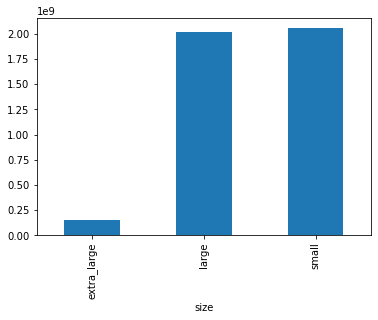

In [17]:
# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()

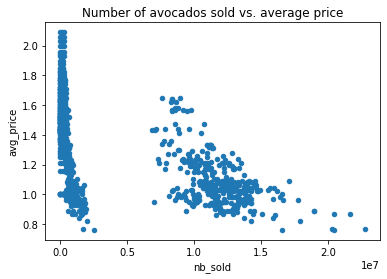

In [18]:
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(kind="scatter", x="nb_sold", y="avg_price", title="Number of avocados sold vs. average price")

# Show the plot
plt.show()

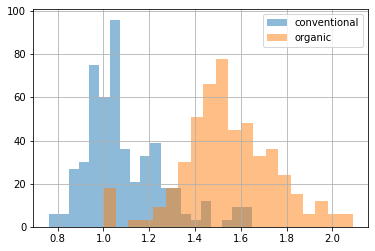

In [19]:
# Histogram of conventional avg_price 
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Histogram of organic avg_price
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

       date   type   year  avg_price   size  nb_sold
0     False  False  False      False  False    False
1     False  False  False      False  False    False
2     False  False  False      False  False    False
3     False  False  False      False  False    False
4     False  False  False      False  False    False
...     ...    ...    ...        ...    ...      ...
1009  False  False  False      False  False    False
1010  False  False  False      False  False    False
1011  False  False  False      False  False    False
1012  False  False  False      False  False    False
1013  False  False  False      False  False    False

[1014 rows x 6 columns]
date         False
type         False
year         False
avg_price    False
size         False
dtype: bool


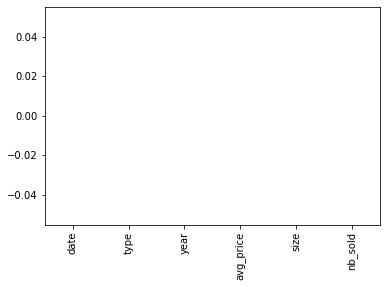

In [21]:
# Check individual values for missing values
print(avocados.isna())

# Check each column for missing values
print(avocados.isna().any().head())

# Bar plot of missing values by variable
avocados.isna().sum().plot(kind="bar")

# Show plot
plt.show()

In [22]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date":"2019-11-03" ,"small_sold" : 10376832, "large_sold": 7835071},
    {"date":"2019-11-10" ,"small_sold" : 10717154, "large_sold": 8561348 },
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


In [23]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17","2019-12-01" ],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


In [26]:
# Create avocados_totals_sorted
avocados_totals_sorted = avocados_2019.sort_values("date", ascending=False)

# Print avocados_totals_sorted
print(avocados_totals_sorted)

# Save as avocados_totals_sorted.csv
avocados_totals_sorted.to_csv("avocados_totals_sorted.csv")

         date  small_sold  large_sold
1  2019-12-01     9291631     6238096
0  2019-11-17    10859987     7674135


#### Joining/Merging Data
<b>Inner join</b> Merges 2 DF and results in new DF with rows tht have matching values in both DFs <br></br>  
<b>var = df1.merge(df2, on="col1", suffixes="_df1", "_df2")</b> Meging df1 with df2 on the column col1.  Suffixes argumnets gives suffixes to. This is an inner join. Can pass a list to on parameter <br></br>
<b>One-to-many</b> Every row in the left table is related to one or more rows in the right table <br></br>
<br></br>
<b>df1.merge(df2, on="col1")</b><br>
    <b>.merge(df3, on="col2") </b>  Merging multiple DFs. Backslash continures code onto next line <br></br>
<br></br>
<b>Left Join</b> The whole left DF will return all rows of data from left table and only rows from the right where the key columns match. use merge() with how parameter. Right join is the mirror of left join <br></br>
<b>var = df1.merge(df2, on="col1", how="left")</b> <br></br>
<b>var = df1.merge(df2, how="right", left_on="col1_left", right_on="col1_right")</b> Merging df1 and df2 on columns col1_left for the left DF(df1), and col1_right for the right(df2).
<br></br> 
<b>Outer Join</b> Results all rows from both DFs regardless if there is a match or not <br></br>
<b>Self Join</b> Same methods and attributes are used. right_on and left_on attribute are used on the single DF. Can use how attribute. Usually use this type of join when table has a hierarchical relationship, sequential relationship, graph data within rows
<br></br>
<b>Merging on indexes</b> <br></br>
var1 = df1.merge(df2, left_on="index1_left", left_index=True, right_on="index1_right", right_index=True)
<br></br>
<b>Validates relationship of tables</b> <br></br>
.merge(validate="one_to_one") makes sure the tables being merged are one to one. If not true a merge error is raised <br></br>
<br></br>
<b>pd.merge_ordered(df1, df2, fill_method="ffill")</b> default is outer join. Usually used in time series data. <br></br>
<b>forward fill</b> Parameter to fill missing data with previous data value in same column 


#### Filtering Joins 
Filter joins: Filter observations from a table based on wheather or not they match an observation in another table. <br></br>
<b>semi-join</b> Filter the left table down to those observations that have a match on the right table. No dups are returned even if it is a one-to-many relationshi|p. <br></br>
<b>Code: use inner join then = inner_merge</b> <br></br>
var1 = df1[df1["merge_col"].isin(inner_merge["merge_col"])] <br></br>
<br></br>
<b>Anti-join</b> Returns observations in the left table that do not have a matching observation in the right table <br></br>
<b>Code: use left join with indicator parameter set to True = left_join </b> <br></br>
var1 = left_join.loc[left_join["_merge"] == "_merge_value", "merge_col"] <br></br>
var2 = df1[df1["merge_col"].isin(var1)]

#### Selecting/Reshaping data w/ .query()/.melt()
<b>df.query("col1 >= 90 and col1 < 140")</b> <br></br>
<b>.melt()</b> Will unpivot our dataset to a long format which is more accessible to computers <br></br>
<b>var1 = df1.melt(id_vars=["col1", "col2"], value_vars["col3", "col4"], var_name="", value_name="") </b> id_vars is columns in original dataset that we do not want to change. value_vars is columns we want to unpivot. 

In [32]:
import pickle

taxi_veh = pickle.load(open("taxi_vehicles.p", "rb"))
taxi_owners = pickle.load(open("taxi_owners.p", "rb"))
licenses = pickle.load(open("licenses.p", "rb"))
biz_owners = pickle.load(open("business_owners.p", "rb"))
ridership = pickle.load(open("cta_ridership.p", "rb"))
cal = pickle.load(open("cta_calendar.p", "rb"))
stations = pickle.load(open("stations.p", "rb"))
zip_demo = pickle.load(open("zip_demo.p", "rb"))
wards = pickle.load(open("ward.p", "rb"))
land_use = pickle.load(open("land_use.p", "rb"))
census = pickle.load(open("census.p", "rb"))

# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own','_veh'))

# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64


In [33]:
# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on="account")

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby("title").agg({'account':'count'})

# Sort the counted_df in desending order
sorted_df = counted_df.sort_values("account", ascending=False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())

                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970


In [34]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')

# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == "Weekday") 
                   & (ridership_cal_stations['station_name'] == "Wilson"))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


In [36]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on="zip") \
            			.merge(wards, on="ward")

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby("alderman").agg({'income':'median'}).head())

                       income
alderman                     
Ameya Pawar             66246
Anthony A. Beale        38206
Anthony V. Napolitano   82226
Ariel E. Reyboras       41307
Brendan Reilly         110215


In [37]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})

# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(["vacant", "account", "pop_2010"], 
                                             ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

   ward  pop_2010  vacant  account
47    7     51581      19       80
12   20     52372      15      123
1    10     51535      14      130
16   24     54909      13       98
7    16     51954      13      156


In [39]:
movies = pickle.load(open("movies.p", "rb"))
financials = pickle.load(open("financials.p", "rb"))

# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isna().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


In [ ]:
stations = pickle.load(open("stations.p", "rb"))
stations = pickle.load(open("stations.p", "rb"))

# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on="id", right_on="movie_id")

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

In [ ]:
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', 
                                      left_on="movie_id", 
                                      right_on="id")

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

In [ ]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     how="outer",
                                     on="id",
                                     suffixes=('_1','_2'))

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | 
     (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

In [ ]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))

# Create a boolean index to select the appropriate rows
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
                  (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())

In [ ]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index=True,
                             suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values("diff", ascending=False).head())

In [ ]:
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], 
                            keys=['7Jul','8Aug','9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind='bar')
plt.show()

In [ ]:
# Use the .append() method to combine the tracks tables
metallica_tracks = tracks_ride.append([tracks_master, tracks_st], sort=False)

# Merge metallica_tracks and invoice_items
tracks_invoices = metallica_tracks.merge(invoice_items, on="tid", how="inner")

# For each tid and name sum the quantity sold
tracks_sold = tracks_invoices.groupby(['tid','name']).agg({"quantity":"sum"})

# Sort in decending order by quantity and print the results
print(tracks_sold.sort_values("quantity", ascending=False))

In [ ]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)

# Merge classic_18_19 with pop_18_19
classic_pop = classic_18_19.merge(pop_18_19, on='tid')

# Using .isin(), filter classic_18_19 rows where tid is in classic_pop
popular_classic = classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]

# Print popular chart
print(popular_classic)

In [ ]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['gdp','returns']] # Don't need to put gdp_sp500 twice b/c there is no logical condition. You are just selecting columns

# Print gdp_returns correlation
print(gdp_returns.corr())

In [40]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, 
                                      on='date', how='inner')

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(kind='scatter', x='unemployment_rate', y='cpi')
plt.show()

NameError: name 'inflation' is not defined

In [ ]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', 
                          suffixes=('', '_wells'), direction='nearest')

# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', 
                              suffixes=('_jpm', '_bac'), direction='nearest')

# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm','close_wells','close_bac'])
plt.show()

In [ ]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on='date')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()

In [ ]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

# Pivot data so gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table(values='gdp_per_capita', index='date', columns='country')

# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

In [ ]:
# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars=["year"], var_name="month", value_name="unempl_rate")


# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'] + '-' + ur_tall["month"])

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values("date")

# Plot the unempl_rate by date
ur_sorted.plot(x="date", y="unempl_rate")
plt.show()

In [ ]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars=["metric"],var_name='date', value_name='close')

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query("metric == 'close'")

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on="date", how="inner", suffixes=('_dow', '_bond'))


# Plot only the close_dow and close_bond columnss
dow_bond.plot( x='date', y=["close_dow", "close_bond"], rot=90)
plt.show()